In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.datasets import fetch_california_housing

In [9]:
house_data = fetch_california_housing(as_frame=True).frame
house_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
house_data.shape

(20640, 9)

In [7]:
house_data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

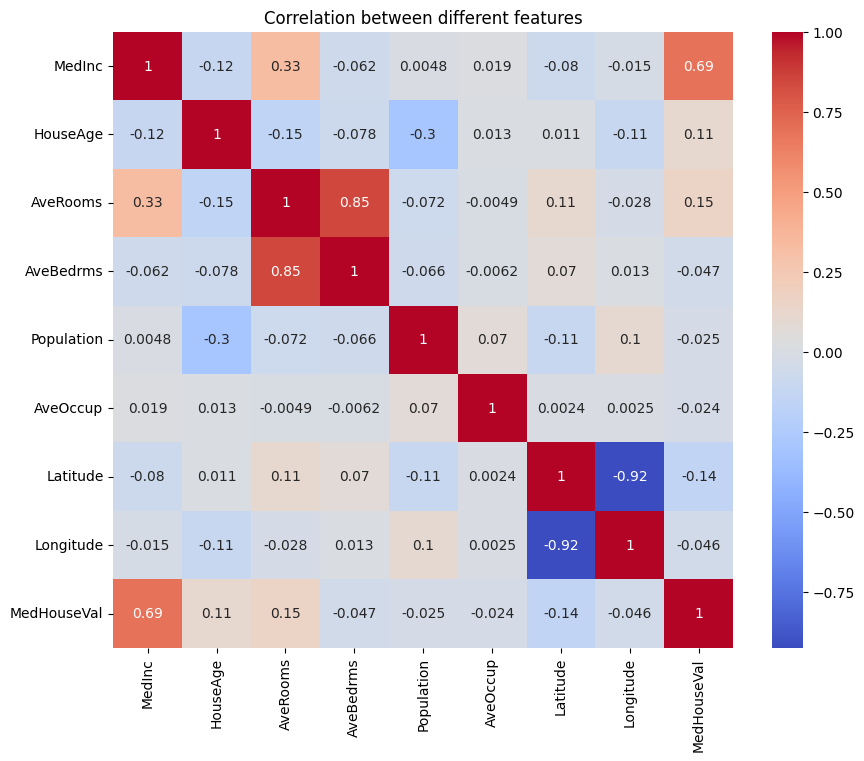

In [10]:
# understanding correlation between features
correlation = house_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')   
plt.title("Correlation between different features")
plt.show()

In [11]:
X = house_data.drop(columns=['MedHouseVal'], axis=1)
y = house_data['MedHouseVal']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [15]:
models = [
    ("KNeighbors",KNeighborsRegressor()),
    ("LinearRegressionR",LinearRegression()),
    ("DecisionTree", DecisionTreeRegressor()),
    ("RandomForest",RandomForestRegressor()),
    ("XGR", XGBRegressor()),
]

In [16]:
for name,model in models:    
    model.fit(X_train, y_train)

In [17]:
print("Model Prediction on training Data")
print("-------------------------------")
print()
for name, model in models:   
    print(f"Model - {name}")
    train_data_prediction = model.predict(X_train)
    r_score_train = r2_score(y_train, train_data_prediction)  
    mar_train = mean_absolute_error(y_train, train_data_prediction)  
    print(f"R2 Score - {r_score_train}")
    print(f"Mean Absolute Error  - {mar_train}")
    print()

Model Prediction on training Data
-------------------------------

Model - KNeighbors
R2 Score - 0.45292523357436776
Mean Absolute Error  - 0.6561495124757751

Model - LinearRegressionR
R2 Score - 0.6125511913966952
Mean Absolute Error  - 0.5286283596581923

Model - DecisionTree
R2 Score - 1.0
Mean Absolute Error  - 4.217126217568424e-17

Model - RandomForest
R2 Score - 0.9736375850684414
Mean Absolute Error  - 0.12167864401041707

Model - XGR
R2 Score - 0.9445725845802867
Mean Absolute Error  - 0.19257627556572793



In [18]:
print("Model Prediction on test Data")
print("-------------------------------")
print()
for name, model in models:   
    print(f"Model - {name}")
    test_data_prediction = model.predict(X_test)
    r_score_test = r2_score(y_test, test_data_prediction)
    mar_test = mean_absolute_error(y_test, test_data_prediction)
    print(f"R2 Score - {r_score_test}")
    print(f"Mean Absolute Error  - {mar_test}")
    print()

Model Prediction on test Data
-------------------------------

Model - KNeighbors
R2 Score - 0.14631049965900345
Mean Absolute Error  - 0.8127975600775195

Model - LinearRegressionR
R2 Score - 0.575787706032451
Mean Absolute Error  - 0.5332001304956555

Model - DecisionTree
R2 Score - 0.6070765741134174
Mean Absolute Error  - 0.4593424733527132

Model - RandomForest
R2 Score - 0.8081537109079413
Mean Absolute Error  - 0.32595211085271336

Model - XGR
R2 Score - 0.8301370561019205
Mean Absolute Error  - 0.30957335413783094

